# There is example of some test from event study package

In [1]:
import numpy as np
import pandas as pd
from multiple_event import skewness_corrected_test, crude_dependence, multiple_cross_sectional_test
from single_event import single_t_test, single_criterion_t_test
from models import max_sharpe_rate_portfolio, min_risk_portfolio_model
from utils import portfolio_plot, market_plot

## Close portfolio from datasets/close_portfolio.csv
### Event date when something happened

In [2]:
close = pd.read_csv('data_import/datasets/close_portfolio.csv', index_col='time')

close['market'] = [close.iloc[i].sum() for i in range(len(close))]

close.index = pd.to_datetime(close.index)

date = pd.to_datetime('2022-02-24 07:00:00+00:00')

In [3]:
#portfolio_plot(portfolio=close, event_date=date) # uncomment if u need full portfolio prices to watch

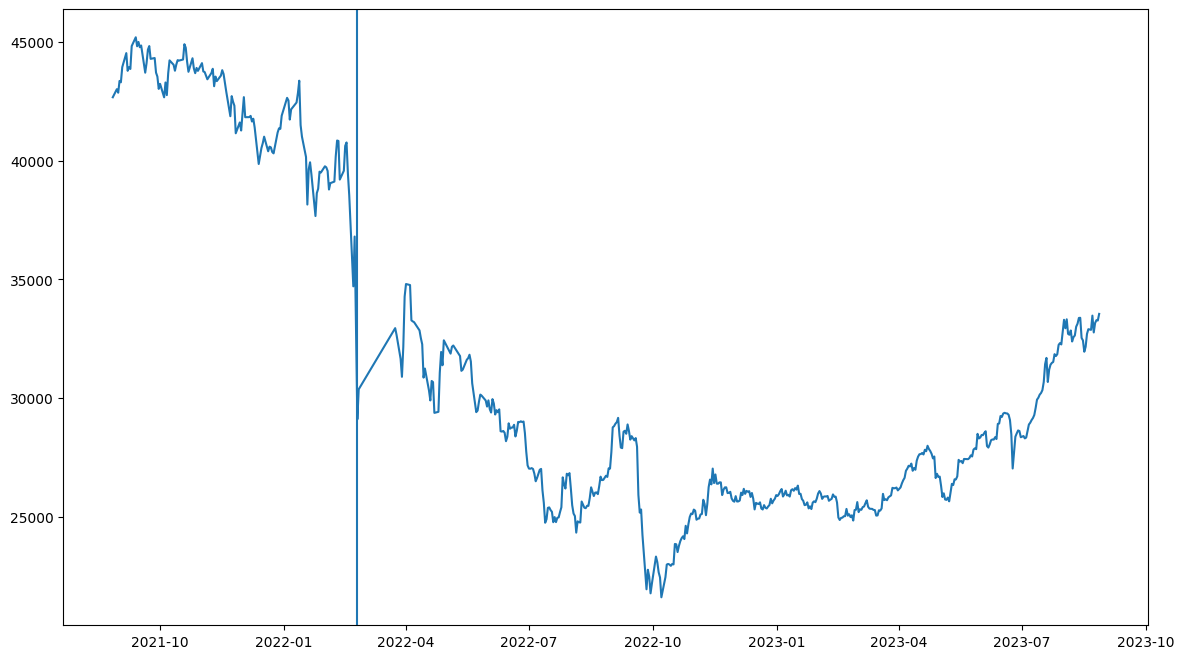

In [4]:
market_plot(market=close.market, event_date=date)

## Calculate tests

In [5]:
result_multiple_skew = skewness_corrected_test(portfolio=close, event_date=date, method='aar')

result_multiple_crude = crude_dependence(portfolio=close, event_date=date, method='aar')

result_multiple_cross_sectional = multiple_cross_sectional_test(portfolio=close, event_date=date, method='aar')

result_single_t_test = single_t_test(portfolio=close, event_date=date)

result_single_criterion = single_criterion_t_test(portfolio=close, event_date=date)

## Skewness test:

In [6]:
display(result_multiple_skew)

,aar,t_stat,p_value,significant
time,,,,
2022-02-16 07:00:00+00:00,0.008072,1.583627,0.137294,False
2022-02-17 07:00:00+00:00,-0.005092,-0.871426,0.399329,False
2022-02-18 07:00:00+00:00,-0.014040,-2.348615,0.035317,True
2022-02-21 07:00:00+00:00,-0.030479,-2.909487,0.012184,True
2022-02-22 07:00:00+00:00,-0.010936,-0.776633,0.451276,False
2022-02-24 07:00:00+00:00,-0.090760,-3.539847,0.003626,True
2022-02-25 07:00:00+00:00,0.008408,0.415158,0.684796,False
2022-03-24 07:00:00+00:00,-0.048091,-1.955402,0.072378,False
2022-03-25 07:00:00+00:00,-0.031521,-2.040349,0.062169,False


## Crude-dependence test:

In [7]:
display(result_multiple_crude)

,aar,t_stat,p_value,significant
time,,,,
2022-02-16 07:00:00+00:00,0.013238,4.416782,2.099184e-05,True
2022-02-17 07:00:00+00:00,0.000075,0.024858,9.802064e-01,False
2022-02-18 07:00:00+00:00,-0.008874,-2.960815,3.652901e-03,True
2022-02-21 07:00:00+00:00,-0.025313,-8.445643,5.417888e-14,True
2022-02-22 07:00:00+00:00,-0.005770,-1.925275,5.639594e-02,False
2022-02-24 07:00:00+00:00,-0.085594,-28.558575,0.000000e+00,True
2022-02-25 07:00:00+00:00,0.013574,4.528982,1.332933e-05,True
2022-03-24 07:00:00+00:00,-0.042925,-14.322105,0.000000e+00,True
2022-03-25 07:00:00+00:00,-0.026355,-8.793417,7.771561e-15,True


## Cross-sectional-test:

In [8]:
display(result_multiple_cross_sectional)

,AAR,t_stat,p_value,significant,idx
time,,,,,
2022-02-16 07:00:00+00:00,0.009947,2.220157,0.022403,True,-5
2022-02-17 07:00:00+00:00,-0.003216,-0.616712,0.274037,False,-4
2022-02-18 07:00:00+00:00,-0.012164,-2.029522,0.031696,False,-3
2022-02-21 07:00:00+00:00,-0.028603,-2.304468,0.019170,True,-2
2022-02-22 07:00:00+00:00,-0.009061,-0.664822,0.258892,False,-1
2022-02-24 07:00:00+00:00,-0.088884,-3.431757,0.002231,True,0
2022-02-25 07:00:00+00:00,0.010283,0.572218,0.288468,False,1
2022-03-24 07:00:00+00:00,-0.046216,-2.034931,0.031389,False,2
2022-03-25 07:00:00+00:00,-0.029646,-1.906987,0.039432,False,3


## T-test for first 3 stock in portfolio:

In [9]:
for i in range(3):

    print(' ')

    print(close.columns[i])

    display(result_single_t_test[i])
    
    print('___________________________________________________________________________')

 
SBERP


,AR,t_stat,p_value,significant,idx
time,,,,,
2022-02-16 07:00:00+00:00,0.012553,0.812789,4.179622e-01,False,-5
2022-02-17 07:00:00+00:00,-0.008236,-0.533265,5.948447e-01,False,-4
2022-02-18 07:00:00+00:00,-0.010715,-0.693804,4.891573e-01,False,-3
2022-02-21 07:00:00+00:00,-0.071790,-4.648381,8.721161e-06,True,-2
2022-02-22 07:00:00+00:00,-0.018452,-1.194759,2.345570e-01,False,-1
2022-02-24 07:00:00+00:00,-0.113133,-7.325318,3.100897e-11,True,0
2022-02-25 07:00:00+00:00,-0.052063,-3.371046,1.010387e-03,True,1
2022-03-24 07:00:00+00:00,-0.062634,-4.055546,8.970584e-05,True,2
2022-03-25 07:00:00+00:00,-0.020117,-1.302542,1.952465e-01,False,3


___________________________________________________________________________
 
LKOH


,AR,t_stat,p_value,significant,idx
time,,,,,
2022-02-16 07:00:00+00:00,-0.004830,-0.378275,0.705900,False,-5
2022-02-17 07:00:00+00:00,-0.005328,-0.417263,0.677238,False,-4
2022-02-18 07:00:00+00:00,-0.019921,-1.560119,0.121387,False,-3
2022-02-21 07:00:00+00:00,-0.010406,-0.814929,0.416741,False,-2
2022-02-22 07:00:00+00:00,-0.018944,-1.483617,0.140554,False,-1
2022-02-24 07:00:00+00:00,-0.038184,-2.990442,0.003386,True,0
2022-02-25 07:00:00+00:00,0.017302,1.355036,0.177973,False,1
2022-03-24 07:00:00+00:00,0.046896,3.672676,0.000361,True,2
2022-03-25 07:00:00+00:00,-0.050306,-3.939729,0.000138,True,3


___________________________________________________________________________
 
GAZP


,AR,t_stat,p_value,significant,idx
time,,,,,
2022-02-16 07:00:00+00:00,-0.010398,-0.589673,5.565278e-01,False,-5
2022-02-17 07:00:00+00:00,-0.013932,-0.790070,4.310585e-01,False,-4
2022-02-18 07:00:00+00:00,-0.028925,-1.640286,1.035866e-01,False,-3
2022-02-21 07:00:00+00:00,-0.061001,-3.459214,7.526053e-04,True,-2
2022-02-22 07:00:00+00:00,0.012750,0.722994,4.711021e-01,False,-1
2022-02-24 07:00:00+00:00,-0.016294,-0.923983,3.573648e-01,False,0
2022-02-25 07:00:00+00:00,0.017520,0.993533,3.224661e-01,False,1
2022-03-24 07:00:00+00:00,0.014644,0.830420,4.079643e-01,False,2
2022-03-25 07:00:00+00:00,-0.126077,-7.149534,7.622325e-11,True,3


___________________________________________________________________________


## Change event date on date when nothing happened

In [10]:
close = pd.read_csv('data_import/datasets/close_portfolio.csv', index_col='time')

close['market'] = [close.iloc[i].sum() for i in range(len(close))]

close.index = pd.to_datetime(close.index)

date = pd.to_datetime('2023-01-20 07:00:00+00:00')

In [11]:
#portfolio_plot(portfolio=close, event_date=date) # uncomment if u need full portfolio prices to watch

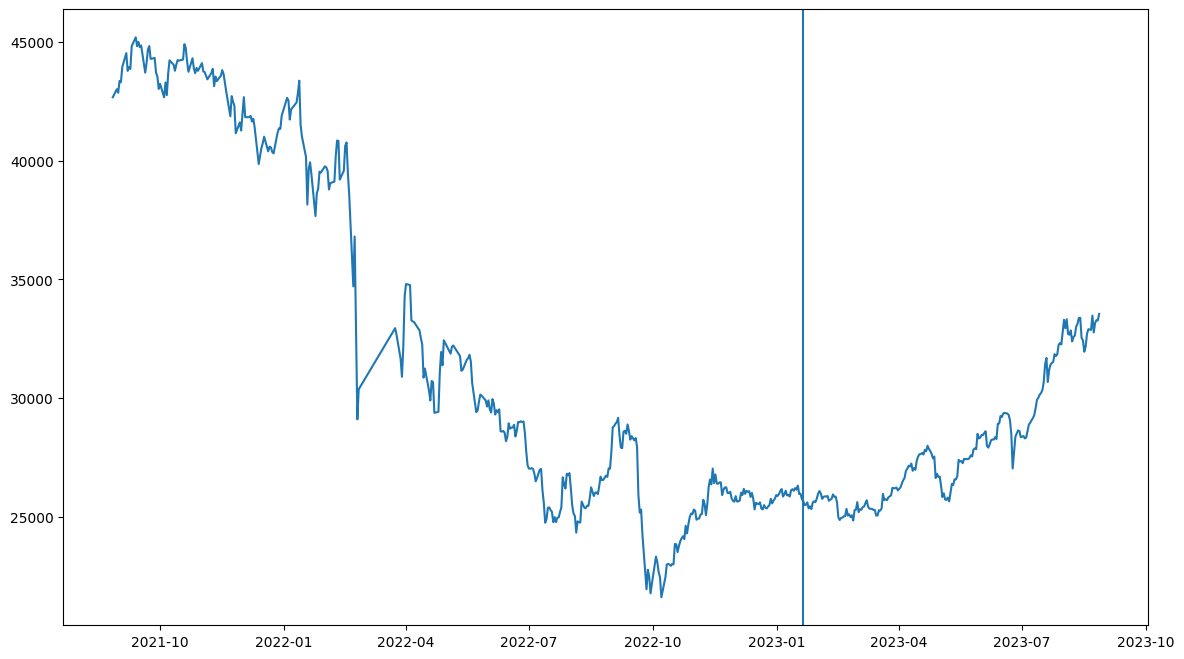

In [12]:
market_plot(market=close.market, event_date=date)

## Calculate tests

In [13]:
result_multiple_skew = skewness_corrected_test(portfolio=close, event_date=date, method='aar')

result_multiple_crude = crude_dependence(portfolio=close, event_date=date, method='aar')

result_multiple_cross_sectional = multiple_cross_sectional_test(portfolio=close, event_date=date, method='aar')

result_single_t_test = single_t_test(portfolio=close, event_date=date)

result_single_criterion = single_criterion_t_test(portfolio=close, event_date=date)

## Skewness test:

In [14]:
display(result_multiple_skew)

,aar,t_stat,p_value,significant
time,,,,
2023-01-15 07:00:00+00:00,0.003840,1.778469,0.098708,False
2023-01-16 07:00:00+00:00,0.009160,2.062769,0.059705,False
2023-01-17 07:00:00+00:00,-0.002342,-0.353113,0.729664,False
2023-01-18 07:00:00+00:00,0.000555,0.281875,0.782477,False
2023-01-19 07:00:00+00:00,-0.003239,-0.702157,0.494962,False
2023-01-20 07:00:00+00:00,0.004692,1.675058,0.117795,False
2023-01-21 07:00:00+00:00,0.006308,3.687603,0.002734,True
2023-01-22 07:00:00+00:00,0.001482,0.724479,0.481608,False
2023-01-23 07:00:00+00:00,0.005748,2.087337,0.057109,False


## Crude-dependence test:

In [15]:
display(result_multiple_crude)

,aar,t_stat,p_value,significant
time,,,,
2023-01-15 07:00:00+00:00,0.005482,3.336190,1.109707e-03,True
2023-01-16 07:00:00+00:00,0.010802,6.574021,1.103134e-09,True
2023-01-17 07:00:00+00:00,-0.000700,-0.425929,6.708691e-01,False
2023-01-18 07:00:00+00:00,0.002198,1.337435,1.834341e-01,False
2023-01-19 07:00:00+00:00,-0.001596,-0.971398,3.331681e-01,False
2023-01-20 07:00:00+00:00,0.006335,3.855082,1.816278e-04,True
2023-01-21 07:00:00+00:00,0.007950,4.838248,3.671607e-06,True
2023-01-22 07:00:00+00:00,0.003124,1.901257,5.949882e-02,False
2023-01-23 07:00:00+00:00,0.007390,4.497381,1.515958e-05,True


## Cross-sectional-test:

In [16]:
display(result_multiple_cross_sectional)

,AAR,t_stat,p_value,significant,idx
time,,,,,
2023-01-15 07:00:00+00:00,0.004164,1.214026,0.123166,False,-5
2023-01-16 07:00:00+00:00,0.009484,1.482919,0.080965,False,-4
2023-01-17 07:00:00+00:00,-0.002018,-0.247501,0.404193,False,-3
2023-01-18 07:00:00+00:00,0.000879,0.360110,0.362274,False,-2
2023-01-19 07:00:00+00:00,-0.002915,-0.822853,0.212714,False,-1
2023-01-20 07:00:00+00:00,0.005016,1.298041,0.108416,False,0
2023-01-21 07:00:00+00:00,0.006632,1.948228,0.036654,False,1
2023-01-22 07:00:00+00:00,0.001806,0.542466,0.298337,False,2
2023-01-23 07:00:00+00:00,0.006072,1.288555,0.110007,False,3


## T-test for first 3 stock in portfolio:

In [17]:
for i in range(3):

    print(' ')

    print(close.columns[i])

    display(result_single_t_test[i])
    
    print('___________________________________________________________________________')

 
SBERP


,AR,t_stat,p_value,significant,idx
time,,,,,
2023-01-15 07:00:00+00:00,0.002695,0.228436,0.819700,False,-5
2023-01-16 07:00:00+00:00,-0.015219,-1.290055,0.199533,False,-4
2023-01-17 07:00:00+00:00,-0.012968,-1.099232,0.273886,False,-3
2023-01-18 07:00:00+00:00,0.004091,0.346803,0.729352,False,-2
2023-01-19 07:00:00+00:00,-0.011351,-0.962166,0.337917,False,-1
2023-01-20 07:00:00+00:00,0.004492,0.380809,0.704024,False,0
2023-01-21 07:00:00+00:00,0.006202,0.525755,0.600037,False,1
2023-01-22 07:00:00+00:00,-0.007908,-0.670350,0.503934,False,2
2023-01-23 07:00:00+00:00,-0.003318,-0.281268,0.778993,False,3


___________________________________________________________________________
 
LKOH


,AR,t_stat,p_value,significant,idx
time,,,,,
2023-01-15 07:00:00+00:00,0.014217,1.005219,0.316831,False,-5
2023-01-16 07:00:00+00:00,-0.008252,-0.583490,0.560668,False,-4
2023-01-17 07:00:00+00:00,0.011218,0.793156,0.429266,False,-3
2023-01-18 07:00:00+00:00,0.006285,0.444370,0.657582,False,-2
2023-01-19 07:00:00+00:00,0.004204,0.297255,0.766790,False,-1
2023-01-20 07:00:00+00:00,0.000500,0.035339,0.971868,False,0
2023-01-21 07:00:00+00:00,0.012528,0.885822,0.377500,False,1
2023-01-22 07:00:00+00:00,0.013169,0.931156,0.353658,False,2
2023-01-23 07:00:00+00:00,0.006199,0.438288,0.661972,False,3


___________________________________________________________________________
 
GAZP


,AR,t_stat,p_value,significant,idx
time,,,,,
2023-01-15 07:00:00+00:00,0.014232,0.610896,0.542433,False,-5
2023-01-16 07:00:00+00:00,0.008268,0.354898,0.723294,False,-4
2023-01-17 07:00:00+00:00,-0.005820,-0.249813,0.803162,False,-3
2023-01-18 07:00:00+00:00,0.007672,0.329314,0.742497,False,-2
2023-01-19 07:00:00+00:00,0.002644,0.113508,0.909819,False,-1
2023-01-20 07:00:00+00:00,-0.000324,-0.013919,0.988918,False,0
2023-01-21 07:00:00+00:00,0.018931,0.812627,0.418055,False,1
2023-01-22 07:00:00+00:00,0.009663,0.414770,0.679057,False,2
2023-01-23 07:00:00+00:00,0.006551,0.281202,0.779044,False,3


___________________________________________________________________________


## As you can see while market price going down, SBERP is growing thats why -4 and -3 indexes in SBERP are True

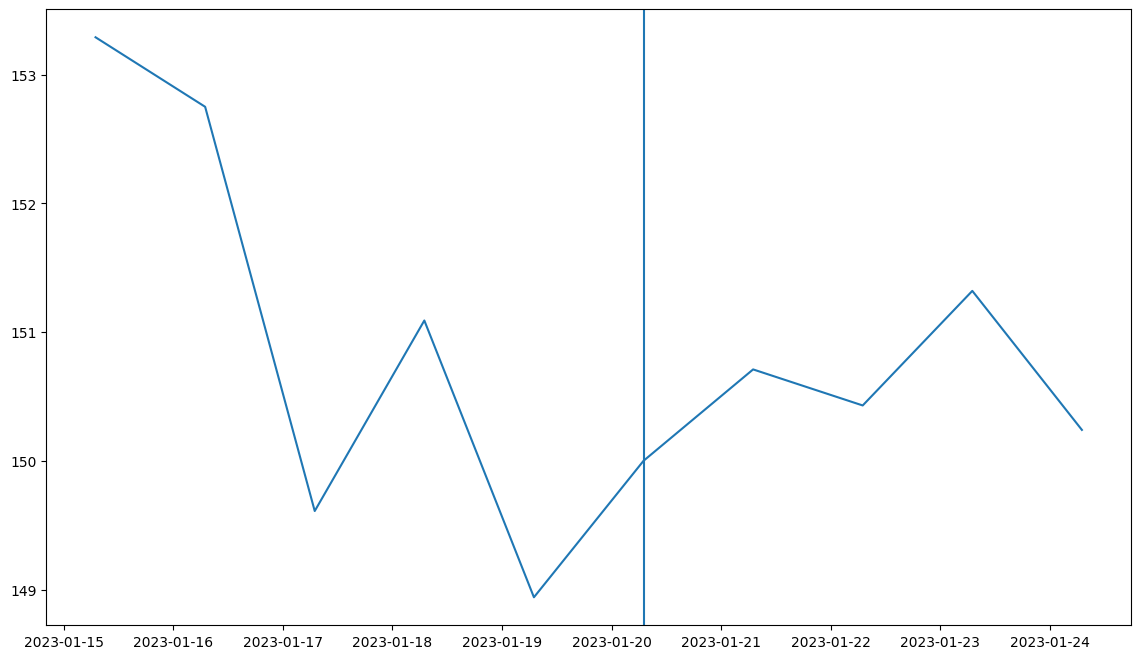

In [18]:
import matplotlib.pyplot as plt

ev_idx = close.index.get_loc(date)
plt.figure(figsize=(14, 8))
plt.plot(close.iloc[:, 0][ev_idx - 5:ev_idx + 5])
plt.axvline(date)

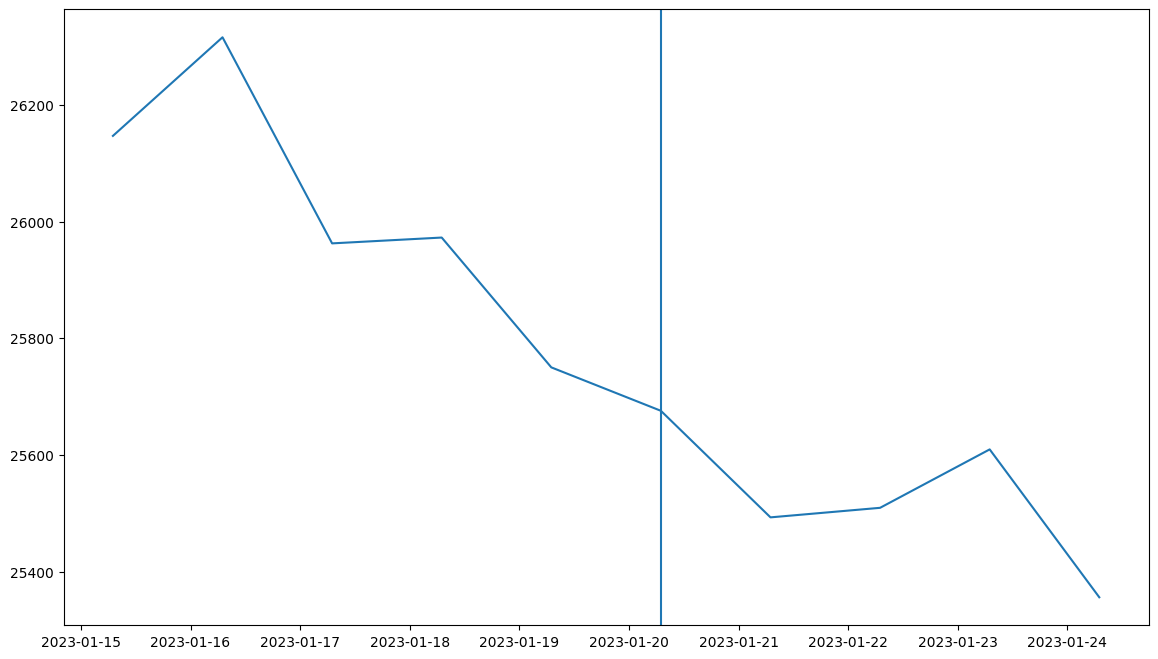

In [19]:
plt.figure(figsize=(14, 8))
plt.plot(close.market[ev_idx - 5: ev_idx + 5])
plt.axvline(date)

## Sharpe(Markowitz) optimization portfolio model

In [20]:
portfolio = close.iloc[:, :-1] # no include market

min_risk = min_risk_portfolio_model(portfolio=portfolio)

max_sharpe = max_sharpe_rate_portfolio(portfolio=portfolio)

### $\sigma \to \min$ propotions of shares in portfolio

In [21]:
min_risk[0]

,SBERP,LKOH,GAZP,FIVE,YNDX,SMLT,SVAV,VTBR,TRMK,GMKN,FEES,AFLT,FLOT
proportions,-0.024969,0.137975,0.018771,0.069838,-0.009114,-0.002959,0.127994,-0.227573,-0.007469,0.64203,-0.007962,0.170911,0.112527


### $\sigma \to \min$ return and risk

In [22]:
min_risk[1]

Params(ret=0.00030357259340160124, risk=0.01639510601995203)

### Sharpe ratio $U(r, \sigma) = \frac{r}{\sigma} \to \max$ proportions of shares in portfolio

In [23]:
max_sharpe[0]

,SBERP,LKOH,GAZP,FIVE,YNDX,SMLT,SVAV,VTBR,TRMK,GMKN,FEES,AFLT,FLOT
proportions,2.358617,1.562169,-0.140823,1.242308,-1.595526,0.474556,2.204853,-2.272113,2.087832,-3.11029,-1.381107,-1.041178,0.610702


### Sharpe ratio $U(r, \sigma) = \frac{r}{\sigma} \to \max$ return and risk

In [24]:
max_sharpe[1]

Params(ret=0.016976019813332945, risk=0.12260294031183765)